In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from skimage import feature
from imutils import build_montages
from imutils import paths
import numpy as np
import argparse
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
def quantify_image(image):
    features = feature.hog(image, orientations=9,pixels_per_cell=(10, 10), cells_per_block=(2, 2),
                           transform_sqrt=True, block_norm="L1")
    return features

In [4]:
def load_split(path):
    imagePaths = list(paths.list_images(path))
    data = []
    labels = []
    for imagePath in imagePaths:
        label = imagePath.split(os.path.sep)[-2]
        image = cv2.imread(imagePath)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (200, 200))
        image = cv2.threshold(image, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        features = quantify_image(image)
        data.append(features)
        labels.append(label)
    return (np.array(data), np.array(labels))

In [5]:
trainingPath=r"D:\Dataset\spiral\training"
testingPath=r"D:\Dataset\spiral\testing"
print("[INFO] loading data...")
(X_train,y_train)=load_split(trainingPath)
(X_test,y_test)=load_split(testingPath)

[INFO] loading data...


In [6]:
le = LabelEncoder()
y_train= le.fit_transform(y_train)
y_test = le.transform(y_test)
print(X_train.shape,y_train.shape)

(72, 12996) (72,)


Random Forest

In [25]:
print("[INFO] training model...")
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

[INFO] training model...


RandomForestClassifier()

In [26]:
testingPaths = list(paths.list_images(testingPath))
idxs = np.arange(0, len(testingPaths))
idxs = np.random.choice(idxs, size=(25,), replace=False)
images = []
for i in idxs:
    image = cv2.imread(testingPaths[i])
    output = image.copy()
    output = cv2.resize(output, (128, 128))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (200, 200))
    image = cv2.threshold(image, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    features = quantify_image(image)
    preds = model.predict([features])
    label = le.inverse_transform(preds)[0]
    color = (0, 255, 0) if label == "healthy" else (0, 0, 255)
    cv2.putText(output, label, (3, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5,color, 2)
    images.append(output)
montage = build_montages(images, (128, 128), (5, 5))[0]
cv2.imshow("Output", montage)
cv2.waitKey(0)

-1

In [27]:
predictions = model.predict(X_test)
accuracy = {}
sensitivity= {}
specificity={}
cm = confusion_matrix(y_test, predictions).flatten()
print(cm)
(tn, fp, fn, tp) = cm
accuracy["Random Forest"]= (tp + tn) / float(cm.sum())
sensitivity["Random Forest"] = tp / float(tp + fn)
specificity["Random Forest"] = tn / float(tn + fp)

[14  1  4 11]


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        15
           1       0.92      0.73      0.81        15

    accuracy                           0.83        30
   macro avg       0.85      0.83      0.83        30
weighted avg       0.85      0.83      0.83        30



Logisitc Regression

In [30]:
print("[INFO] training model...")
from sklearn.linear_model import LogisticRegression  
model =  LogisticRegression(random_state=0)  
model.fit(X_train,y_train)

[INFO] training model...


LogisticRegression(random_state=0)

In [31]:
testingPaths = list(paths.list_images(testingPath))
idxs = np.arange(0, len(testingPaths))
idxs = np.random.choice(idxs, size=(25,), replace=False)
images = []
for i in idxs:
    image = cv2.imread(testingPaths[i])
    output = image.copy()
    output = cv2.resize(output, (128, 128))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (200, 200))
    image = cv2.threshold(image, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    features = quantify_image(image)
    preds = model.predict([features])
    label = le.inverse_transform(preds)[0]
    color = (0, 255, 0) if label == "healthy" else (0, 0, 255)
    cv2.putText(output, label, (3, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5,color, 2)
    images.append(output)
montage = build_montages(images, (128, 128), (5, 5))[0]
cv2.imshow("Output", montage)
cv2.waitKey(0)

-1

In [32]:
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions).flatten()
print(cm)
(tn, fp, fn, tp) = cm
accuracy["Logistic Regression"]= (tp + tn) / float(cm.sum())
sensitivity["Logistic Regression"] = tp / float(tp + fn)
specificity["Logistic Regression"]= tn / float(tn + fp)

[11  4  3 12]


In [33]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.75      0.80      0.77        15

    accuracy                           0.77        30
   macro avg       0.77      0.77      0.77        30
weighted avg       0.77      0.77      0.77        30



Decision Tree Classifier

In [34]:
print("[INFO] training model...")
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy',random_state=0)
model.fit(X_train,y_train)

[INFO] training model...


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [35]:
testingPaths = list(paths.list_images(testingPath))
idxs = np.arange(0, len(testingPaths))
idxs = np.random.choice(idxs, size=(25,), replace=False)
images = []
for i in idxs:
    image = cv2.imread(testingPaths[i])
    output = image.copy()
    output = cv2.resize(output, (128, 128))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (200, 200))
    image = cv2.threshold(image, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    features = quantify_image(image)
    preds = model.predict([features])
    label = le.inverse_transform(preds)[0]
    color = (0, 255, 0) if label == "healthy" else (0, 0, 255)
    cv2.putText(output, label, (3, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5,color, 2)
    images.append(output)
montage = build_montages(images, (128, 128), (5, 5))[0]
cv2.imshow("Output", montage)
cv2.waitKey(0)

-1

In [36]:
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions).flatten()
print(cm)
(tn, fp, fn, tp) = cm
accuracy["Decision Tree"]= (tp + tn) / float(cm.sum())
sensitivity["Decision Tree"] = tp / float(tp + fn)
specificity["Decision Tree"]= tn / float(tn + fp)

[11  4  4 11]


In [37]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        15
           1       0.73      0.73      0.73        15

    accuracy                           0.73        30
   macro avg       0.73      0.73      0.73        30
weighted avg       0.73      0.73      0.73        30



KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [39]:
testingPaths = list(paths.list_images(testingPath))
idxs = np.arange(0, len(testingPaths))
idxs = np.random.choice(idxs, size=(25,), replace=False)
images = []
for i in idxs:
    image = cv2.imread(testingPaths[i])
    output = image.copy()
    output = cv2.resize(output, (128, 128))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (200, 200))
    image = cv2.threshold(image, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    features = quantify_image(image)
    preds = model.predict([features])
    label = le.inverse_transform(preds)[0]
    color = (0, 255, 0) if label == "healthy" else (0, 0, 255)
    cv2.putText(output, label, (3, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5,color, 2)
    images.append(output)
montage = build_montages(images, (128, 128), (5, 5))[0]
cv2.imshow("Output", montage)
cv2.waitKey(0)

C:\Users\Sriya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Sriya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

-1

In [40]:
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions).flatten()
print(cm)
(tn, fp, fn, tp) = cm
accuracy["KNN"]= (tp + tn) / float(cm.sum())
sensitivity["KNN"] = tp / float(tp + fn)
specificity["KNN"]= tn / float(tn + fp)

[11  4  2 13]


C:\Users\Sriya\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79        15
           1       0.76      0.87      0.81        15

    accuracy                           0.80        30
   macro avg       0.81      0.80      0.80        30
weighted avg       0.81      0.80      0.80        30



In [42]:
print("Accuracy Scores: \n")
for key,value in accuracy.items():
    print(key, ": ", value)
    
print("\nSensitivity: \n")
for key,value in sensitivity.items():
    print(key, ": ", value)
    
print("\nSpecificity: \n")
for key,value in specificity.items():
    print(key, ": ", value)

Accuracy Scores: 

Random Forest :  0.8333333333333334
Logistic Regression :  0.7666666666666667
Decision Tree :  0.7333333333333333
KNN :  0.8

Sensitivity: 

Random Forest :  0.7333333333333333
Logistic Regression :  0.8
Decision Tree :  0.7333333333333333
KNN :  0.8666666666666667

Specificity: 

Random Forest :  0.9333333333333333
Logistic Regression :  0.7333333333333333
Decision Tree :  0.7333333333333333
KNN :  0.7333333333333333


In [43]:
models = accuracy.keys()
results = accuracy.values()

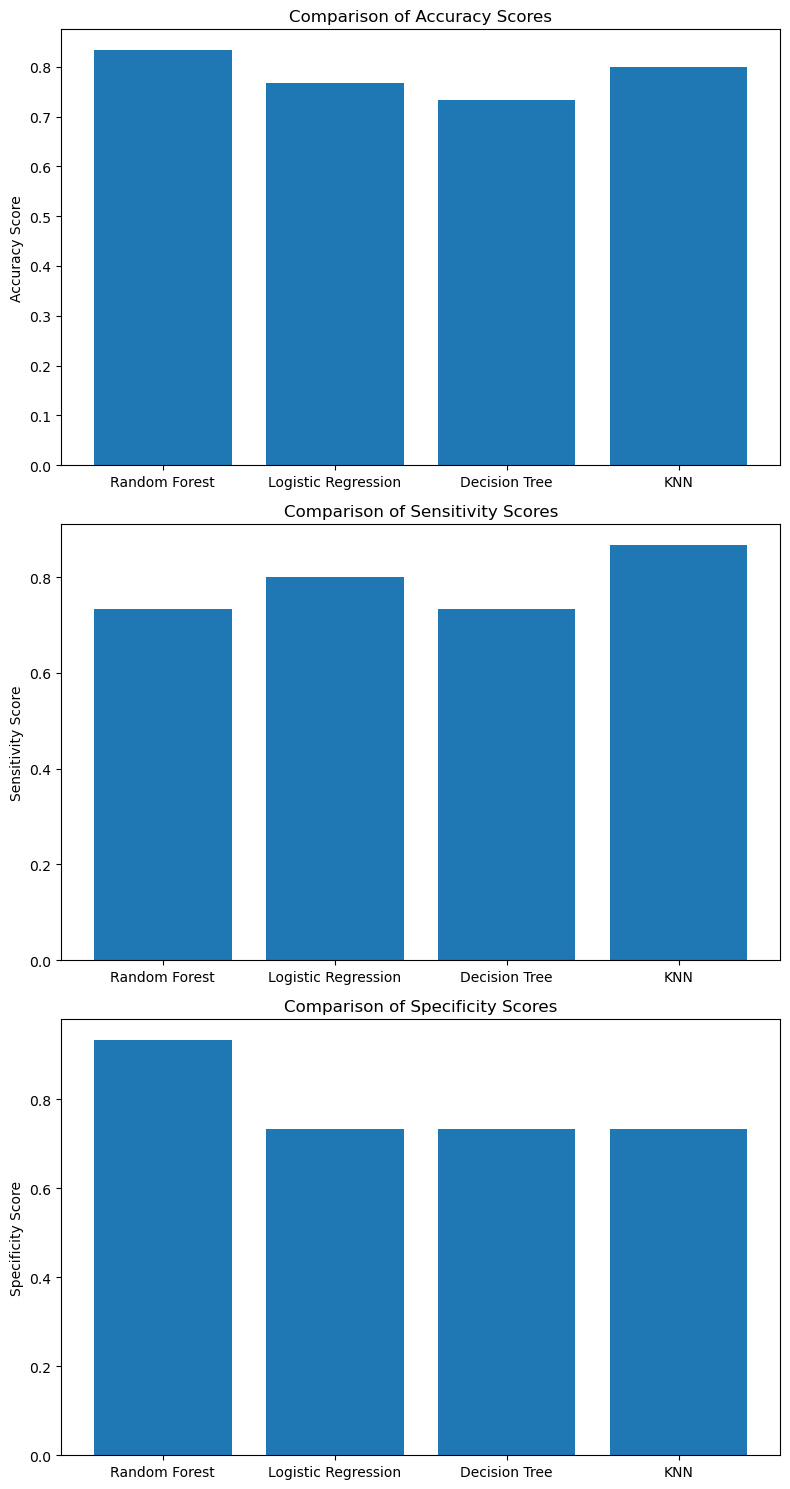

In [44]:
accuracy_scores = accuracy.values()
sensitivity_scores = sensitivity.values()
specificity_scores = specificity.values()

fig, axes = plt.subplots(3, 1, figsize=(8, 15))

axes[0].bar(models, accuracy_scores)
axes[0].set_ylabel('Accuracy Score')
axes[0].set_title('Comparison of Accuracy Scores')

axes[1].bar(models, sensitivity_scores)
axes[1].set_ylabel('Sensitivity Score')
axes[1].set_title('Comparison of Sensitivity Scores')

axes[2].bar(models,specificity_scores)
axes[2].set_ylabel('Specificity Score')
axes[2].set_title('Comparison of Specificity Scores')

plt.tight_layout()
plt.show()


In [45]:
final_model = RandomForestClassifier(n_estimators=100) 
final_model.fit(X_train,y_train)

import pickle
pickle.dump(final_model, open("parkinson.pkl", "wb"))